<a href="https://colab.research.google.com/github/comradearya/MachineLearning/blob/main/%D0%9A%D0%9F_1_%D0%9F%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9E_%D0%9F%D0%BE%D0%BD%D0%BE%D0%BC%D0%B0%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_%D0%86_%D0%86%D0%9A_82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

Використаний датасет має наступні класи:‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’.
Усі зображення розміром 3x32x32

План тренування моделі для розпізнавання
----------------------------

1. Завантажуємо та нормалізуємо датасет, тестуємо датасет використовуючи torchvision.
2. Визначаємо нейронну мережу згортки
3. Визначаємо функцію втрат
4. Навчаємо мережу на даних навчання
5. Перевіяємо мережу за тестовими даними

1. Завантажуємо та нормалізуємо CIFAR10
----------------------------

Використовуючи ``torchvision``, це зробити дуже легко.



In [2]:
import torch
import torchvision
import torchvision.transforms as transforms


Вивід - це PILImage зображення в діапазоні від [0, 1].
Трансформуємо їх у Тезори з нормалізованим діапазоном [-1, 1].

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



Просто подивимося, що ми завантажили.



  cat  bird  bird  bird


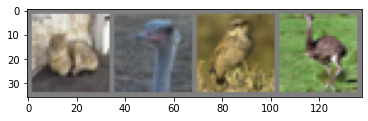

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# функції щоб побачити зображення


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# дістати декілька рандомних тренувальних зображень 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# побачити зображення
imshow(torchvision.utils.make_grid(images))
# виводимо назви класів
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Визначаємо нейрону мережу згротки
-------------------------------------------------
Скопіюйте нейронну мережу та замінемо її на 3-канальні зображення замість 1-канальних, як було заявлено раніше.


In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

3. Визначаємо функцію витрат та оптимізатор
-------------------
Використаємо класифікацію перехресних ентропійних втрат і SGD з імпульсом.



In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

*4*. Тренуємо мережу
^^^^^^^^^^^^^^^^^^^^

Саме зараз все починає ставати цікавішим.
Нам просто потрібно обійти наш ітератор даних і передати вхідні дані до мережі та оптимізувати.



In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Тренування завершено')

[1,  2000] loss: 2.194
[1,  4000] loss: 1.834
[1,  6000] loss: 1.652
[1,  8000] loss: 1.571
[1, 10000] loss: 1.515
[1, 12000] loss: 1.459
[2,  2000] loss: 1.392
[2,  4000] loss: 1.368
[2,  6000] loss: 1.341
[2,  8000] loss: 1.334
[2, 10000] loss: 1.270
[2, 12000] loss: 1.268
Finished Training


5. Тестуємо мережу на тестових даних 
---
Ми навчали мережу за 2 проходи над набором навчальних даних.
Але нам потрібно перевірити, чи мережа взагалі чогось навчилася.

Ми перевіримо це, передбачивши мітку класу нейронної мережі
вихідні дані та перевірка їх на відповідність заземленій істині. Якщо передбачення є
правильно, ми додаємо зразок до списку правильних передбачень.

Добре, перший крок. Давайте покажемо зображення з тестового набору, щоб познайомитися.



GroundTruth:    cat  ship  ship plane


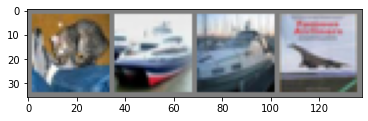

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


Виведемо як нейронна мережа бачить зображення вгорі:


In [1]:
outputs = net(images)

NameError: ignored

Вихідними є енергії для 10 класів.
Чим вища енергія для класу, тим більше мережа
вважає, що зображення належить до певного класу.
Отже, отримаємо індекс найвищої енергії:

In [10]:
_, predicted = torch.max(outputs, 1)

print('Очікується: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog   car plane plane


Результати є доволі непогані

Тепер спробуємо зрозуміти, як нейронка оброблює весь датасет.

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Точність нейронної мережі на 10000 тестових зображень: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


Усе виглядає набагато краще, ніж випадковість, яка становить 10% точності (випадковий вибір
класу з 10 класів).
Здається, мережа чогось навчилася.

Подивимося, по класам, яка точність в кожного:

In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Точність %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 62 %
Accuracy of  bird : 34 %
Accuracy of   cat : 36 %
Accuracy of  deer : 40 %
Accuracy of   dog : 48 %
Accuracy of  frog : 69 %
Accuracy of horse : 75 %
Accuracy of  ship : 71 %
Accuracy of truck : 41 %


Okay, so what next?

How do we run these neural networks on the GPU?

Training on GPU
----------------
Just like how you transfer a Tensor on to the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

The rest of this section assumes that `device` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

.. code:: python

    net.to(device)


Remember that you will have to send the inputs and targets at every step
to the GPU too:

.. code:: python

        inputs, labels = inputs.to(device), labels.to(device)

Why dont I notice MASSIVE speedup compared to CPU? Because your network
is realllly small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
they need to be the same number), see what kind of speedup you get.

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images

Training on multiple GPUs
-------------------------
If you want to see even more MASSIVE speedup using all of your GPUs,
please check out :doc:`data_parallel_tutorial`.

Where do I go next?
-------------------

-  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
-  `Train a state-of-the-art ResNet network on imagenet`_
-  `Train a face generator using Generative Adversarial Networks`_
-  `Train a word-level language model using Recurrent LSTM networks`_
-  `More examples`_
-  `More tutorials`_
-  `Discuss PyTorch on the Forums`_
-  `Chat with other users on Slack`_


